In [1]:
import hydrofunctions as hf
import pandas as pd
import numpy as np
from zipfile import ZipFile
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("ticks")
import random

In [2]:
river='Nanticoke_R'

location = (42.805070, -80.072603)

In [3]:
WSC_STATIONS = pd.read_pickle('../Loadings Canada 2/data/WSC_STATIONS')
WSC_FLOWS = pd.read_pickle('../Loadings Canada 2/data/WSC_FLOWS')
WSC_STATIONS = WSC_STATIONS[WSC_STATIONS.Flow == True]

PWQMN = pd.read_pickle('../Loadings Canada 2/data/PWQMN')

elem = 'CHLORIDE,         UNFIL.REAC'
PWQMN = PWQMN[(PWQMN["PARM DESCRIPTION"]==elem) & (PWQMN.UNITS!='FORMAZIN TURBIDITY UNIT')]
# PWQMN.loc[PWQMN.UNITS=='MICROGRAM PER LITER', "RESULT"] = PWQMN.RESULT/1000


PWQMN_LOC = pd.read_excel('../../measurements/PWQMN/PWQMN Locations.xlsx')

GLNI = pd.read_excel('../../measurements/GLNI/Canadian_Tributaries_concentrations_Serghei.xlsx', sheet_name='Data_GLNI_Erie tribs')

elem_name='Chloride dissolved'

GLNI = GLNI[GLNI.VariableCommonName==elem_name]

GLNI.SiteName.unique()

delta = 0.5
near_stations = WSC_STATIONS[(WSC_STATIONS.LATITUDE>location[0]-delta) & (WSC_STATIONS.LATITUDE<location[0]+delta) &
                     (WSC_STATIONS.LONGITUDE>location[1]-delta) & (WSC_STATIONS.LONGITUDE<location[1]+delta)]


near_pwqmn_stations = PWQMN_LOC[(PWQMN_LOC.LATITUDE>location[0]-delta) & (PWQMN_LOC.LATITUDE<location[0]+delta) &
                     (PWQMN_LOC.LONGITUDE>location[1]-delta) & (PWQMN_LOC.LONGITUDE<location[1]+delta)]


near_glni_stations = GLNI[(GLNI.Latitude>location[0]-delta) & (GLNI.Latitude<location[0]+delta) &
                     (GLNI.Longitude>location[1]-delta) & (GLNI.Longitude<location[1]+delta)]

near_glni_stations = near_glni_stations[['SiteCode','Latitude','Longitude']]

near_glni_stations = near_glni_stations.rename(index=str, columns={'SiteCode':'STATION', 'Latitude':'Latitude'.upper(), 'Longitude':'Longitude'.upper()})


all_near_stations = pd.DataFrame({'STATION':[], 'LONGITUDE':[], 'LATITUDE':[]})

near_stations = near_stations[['STATION_NUMBER', 'LONGITUDE', 'LATITUDE']]

near_stations = near_stations.rename(index=str, columns={'STATION_NUMBER':'STATION'})


near_pwqmn_stations = near_pwqmn_stations[['STATION', 'LONGITUDE', 'LATITUDE']]

all_near_stations = pd.concat([near_stations, near_pwqmn_stations, near_glni_stations])


/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [4]:
PWQMN_IDS = [[st, False] for st in near_pwqmn_stations.STATION.unique()]
GLNI_IDS = [[st, False] for st in near_glni_stations.STATION.unique()]
Flow_IDS = [[st, False] for st in near_stations.STATION.unique()]
# ECCC_IDS = [[st, False] for st in near_eccc_stations.STATION.unique()]

In [45]:
import folium
# import folium.plugins as plugins
from folium.plugins import MiniMap
from folium.plugins.beautify_icon import BeautifyIcon
from folium.features import DivIcon



# m = folium.Map(width=500,height=300, location=location, zoom_start=11.,tiles="OpenStreetMap", attr='Global Water Futures')
m = folium.Map(width=700,height=500, 
                location=location,
               control_scale = True,
                 zoom_start=12.5,
               zoom_control=False,
                 tiles='https://tile.thunderforest.com/outdoors/{z}/{x}/{y}.png?apikey=34dad269f6ab438c9534def56b86fa5f',
                 API_key='34dad269f6ab438c9534def56b86fa5f',
                attr='Global Water Futures')

# show all Flow
# for index, st_dic in enumerate(Flow_IDS):
#     st = st_dic[0]
# #     N = df[df.MonitoringLocationIdentifier==st].shape[0]
# #     if N>10:
#     st_df = near_stations[near_stations.STATION == st]
#     folium.Marker(location=[st_df.LATITUDE.values[0], 
#                             st_df.LONGITUDE.values[0]], 
#                               popup=folium.Popup(html=st_df.STATION.values[0],
#                             show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='gray')
#                  ).add_to(m)



# # show all
if 0:
    for index, st_dic in enumerate(PWQMN_IDS):
        st = st_dic[0]
    # #     N = df[df.MonitoringLocationIdentifier==st].shape[0]
    # #     if N>10:
        st_df = near_pwqmn_stations[near_pwqmn_stations.STATION == st]
        folium.Marker(location=[st_df.LATITUDE.values[0], 
                                st_df.LONGITUDE.values[0]], 
                                  popup=folium.Popup(html=str(st_df.STATION.values[0]),
                                show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='gray')
                     ).add_to(m)
    for index, st_dic in enumerate(GLNI_IDS):
        st = st_dic[0]
    # #     N = df[df.MonitoringLocationIdentifier==st].shape[0]
    # #     if N>10:
        st_df = near_glni_stations[near_glni_stations.STATION == st]
        folium.Marker(location=[st_df.LATITUDE.values[0], 
                                st_df.LONGITUDE.values[0]], 
                                  popup=folium.Popup(html=str(st_df.STATION.values[0]),
                                show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='green')
                     ).add_to(m)
    for index, st_dic in enumerate(Flow_IDS):
        st = st_dic[0]
    # #     N = df[df.MonitoringLocationIdentifier==st].shape[0]
    # #     if N>10:
        st_df = near_stations[near_stations.STATION == st]
        folium.Marker(location=[st_df.LATITUDE.values[0], 
                                st_df.LONGITUDE.values[0]], 
                                  popup=folium.Popup(html=str(st_df.STATION.values[0]),
                                show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='red')
                     ).add_to(m)
else:
    Show_IDS = [
        ["ON02GC1000", True],
        ["02GC022", True],
        [16016400102, True],
    ]



    for index, st_dic in enumerate(Show_IDS):
        st = st_dic[0]
        print(st)
        if st_dic[1]:
            clr='#f44242'
        else:
            clr='#0b15c4'
        coef_r = 1
        a,b = random.randrange(-100, 100, 1)*1e-5*coef_r, random.randrange(-100, 100, 1)*1e-5*coef_r
        st_df = all_near_stations[all_near_stations.STATION == st]
        folium.CircleMarker(location=[st_df.LATITUDE.values[0]+a, 
                                st_df.LONGITUDE.values[0]+b], radius=23, 
                            fill=True, fill_color='white',
                                color = clr,fill_opacity=1,
                           weight=5).add_to(m)
        if not index+1 in [1,2]:
            folium.map.Marker(
#         location=[st_df.LATITUDE.values[0]+0.0235+a,st_df.LONGITUDE.values[0]-0.1026+b], # 10 km
#         location=[st_df.LATITUDE.values[0]+0.0135+a,st_df.LONGITUDE.values[0]-0.0526+b], # 5km
#         location=[st_df.LATITUDE.values[0]+0.0065+a,st_df.LONGITUDE.values[0]-0.026+b], # 2km
        location=[st_df.LATITUDE.values[0]+0.0031+a,st_df.LONGITUDE.values[0]-0.013+b], # 1km
            icon=DivIcon(
                icon_size=(150,36),
                icon_anchor=(0,0),
                html='<div style="font-size: 24pt;text-align: center;vertical-align: middle">{}</div>'.format(index+1),
                )
            ).add_to(m)




m


# ON02GC1000
# 02GC022
# 16016400102




ON02GC1000
02GC022
16016400102


In [42]:
selected_stations = [s[0] for s in Show_IDS]

In [9]:
TP_1 = PWQMN[PWQMN.STATION.isin(selected_stations)][['DATE', 'RESULT','STATION']]
TP_1['RESULT'] = pd.to_numeric(TP_1['RESULT'])
# TP_1['RESULT'] = TP_1['RESULT']*(TP_1['RESULT']<20)

TP_2 = GLNI[GLNI.SiteCode.isin(selected_stations)] # [['DATE', 'RESULT','STATION']]
TP_2 = TP_2[['SampleDateTime', 'Value', 'SiteCode']]
TP_2 = TP_2.rename(index=str, columns={'SampleDateTime':'DATE', 'Value':'RESULT', 'SiteCode':'STATION'})

TP = pd.concat([TP_1, TP_2])


TP['RESULT'] = pd.to_numeric(TP['RESULT'])
# TP.STATION = TP.STATION.apply(str)

pt = sns.color_palette("colorblind", len(selected_stations))



In [29]:
TP = TP[TP.RESULT>1]

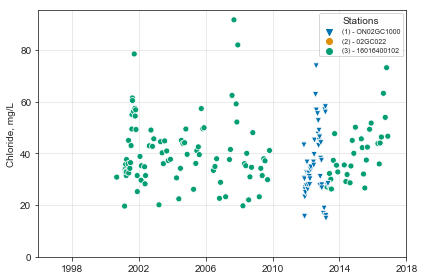

In [36]:
## fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

ax = sns.scatterplot(x='DATE', y='RESULT', data=TP, hue_order=selected_stations, hue='STATION', palette=pt, style='STATION', markers=["o", "v", "s", "p", "*", "o", "v", "s", "p", "*", "o", "v", "s", "p", "*"])
leg = ["({}) - {}".format(i+1,st) for i, st in enumerate(selected_stations)]

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles[1:], leg, title='Stations', fontsize='x-small', loc='best')

# ax.legend(['(1) - HTLP (NCWQR)'], title='Stations', fontsize='x-small', loc=2)

plt.ylim(0,None)
plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Chloride, mg/L")
plt.xlabel("")
plt.tight_layout()
plt.savefig('Rivers/'+river+'/'+river+'_Cl_meas.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/Canada/'+river+'/'+river+'_Cl_meas.pdf')



In [31]:
print(TP.groupby('STATION')["RESULT"].describe().reindex(selected_stations).round(2).to_latex())
      

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  count &   mean &    std &   min &    25\% &   50\% &    75\% &   max \\
STATION     &        &        &        &       &        &       &        &       \\
\midrule
ON02GC1000  &   62.0 &  35.26 &  12.48 &  14.9 &  27.52 &  31.9 &  43.27 &  73.8 \\
02GC022     &    NaN &    NaN &    NaN &   NaN &    NaN &   NaN &    NaN &   NaN \\
16016400102 &  122.0 &  40.30 &  12.42 &  19.6 &  32.25 &  37.6 &  45.60 &  91.6 \\
\bottomrule
\end{tabular}



In [32]:
selected_stations

['ON02GC1000', '02GC022', 16016400102]

In [33]:
master_stations = [st[0] for st in Show_IDS if st[1]]
# master_stations = selected_stations
master_st_df = TP[TP.STATION.isin(master_stations)]
master_st_df['USGSPCode'] = 0
master_st_df.shape

(184, 4)

In [34]:
master_st_df.DATE = master_st_df[master_st_df.DATE>datetime.datetime(1995,12,31)].DATE.dt.date
# = pd.to_date(master_st_df.DATE, format="%Y-%m-%d")
# master_st_df

In [46]:
master_st_df[[
    'DATE','USGSPCode', 'RESULT']].groupby('DATE').mean().reset_index().sort_values('DATE').to_csv(
    'Rivers/'+river+'/Cl_'+river+'iver_data.csv', index=False)

### Discharge

In [37]:
river

'Grand_R'

In [47]:
sites = ['02GC022', ]
total_discharge = pd.DataFrame({})
for site in sites:
    discharge = WSC_FLOWS[WSC_FLOWS.index>datetime.datetime(1996,1,1)][site].to_frame()

    discharge = discharge.reset_index()
    discharge = discharge.rename(index=str, columns={site:'Discharge, cms', 'index':'Date'})
    discharge['Source'] = site
#     total_discharge[site] = discharge['Discharge, cms']
    discharge['Flow, CFS'] = discharge['Discharge, cms']/0.028
    total_discharge = pd.concat([total_discharge, discharge])

In [48]:
# discharge = pd.read_excel('../../measurements/ECCC/Discharge_StClair_Detroit_Niagara_Sydenhame_Thames.xlsx')

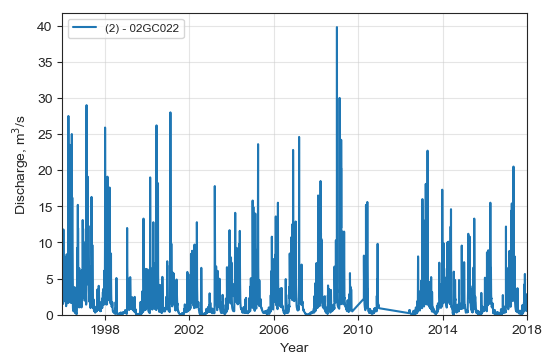

In [49]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
ax=sns.lineplot(x='Date', y='Discharge, cms', data=total_discharge, hue='Source',ax=ax)

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

handles, lables = ax.get_legend_handles_labels()
ax.legend(['({}) - {}'.format(selected_stations.index(site)+1, site) for site in lables[1:]], loc=2, fontsize='small')
ax.set_ylim(0,None)
ax.set_xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
ax.grid(alpha=0.5)
ax.set_ylabel("Discharge, m$^3$/s")
ax.set_xlabel("Year")

# axins = zoomed_inset_axes(ax, 8, loc='upper center')
# sns.lineplot(x='Date', y='Discharge, cms', data=discharge, hue='Source', ax=axins,zorder=10)
# axins.set_xlim(datetime.datetime(2010,4,1), datetime.datetime(2010,6,1)) # apply the x-limits
# axins.set_ylim(0, 10) # apply the y-limits
# plt.yticks(visible=False)
# plt.xticks(visible=False)
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset
# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.savefig('Rivers/'+river+'/'+river+'_Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/Canada/'+river+'/'+river+'_Q.pdf')

In [50]:
total_discharge.groupby(['Source']).describe()

Discharge, cms                                                \
                 count      mean       std    min    25%   50%   75%   
Source                                                                 
02GC022         7321.0  1.989294  2.881898  0.001  0.411  1.03  2.35   

                   Flow, CFS                                             \
               max     count       mean        std       min        25%   
Source                                                                    
02GC022  39.799999    7321.0  71.046212  102.92493  0.035714  14.678572   

                                            
               50%        75%          max  
Source                                      
02GC022  36.785713  83.928568  1421.428543

In [51]:
# discharge = total_discharge[total_discharge.Source=='02GG003']

In [52]:
# discharge['Flow, CFS'] = discharge['Flow, CFS']*1.5

In [53]:
total_discharge[['Date', 'Flow, CFS']].to_csv('Rivers/'+river+'/Flow_'+river+'_CFS.csv', index=False)


### Egret

In [54]:
river

'Nanticoke_R'

In [55]:

EGRET_Daily = pd.read_csv('Rivers/'+river+'/EGRET Result/Cl/'+river+'iver_Cl_Daily.csv')
EGRET_Sample = pd.read_csv('Rivers/'+river+'/EGRET Result/Cl/'+river+'iver_Cl_Sample.csv')


EGRET_Sample['Fx_Hat'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcHat']/1000/1000
EGRET_Sample['Fx_C'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcAve']/1000/1000


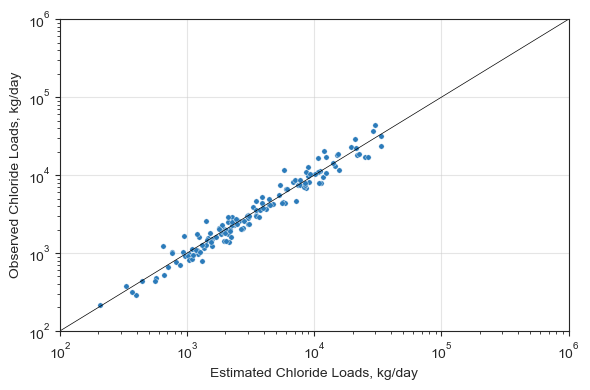

In [57]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
sns.scatterplot(y='Fx_C', 
                x='Fx_Hat',
                data=EGRET_Sample,
                s=15,
                linewidth=0.3, ax=ax,
               color=sns.color_palette("Blues")[4])
# plt.legend("")
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot([-100,100000000],[-100,100000000], 'k', lw=0.5)
min_lim, max_lim = 1e2, 1e6
plt.xlim(min_lim,max_lim)
plt.ylim(min_lim,max_lim)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.xlabel("Estimated Chloride Loads, kg/day")
plt.ylabel("Observed Chloride Loads, kg/day")
# plt.xlabel("")
plt.tight_layout()
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/Canada/'+river+'/'+river+'_FvsF.pdf')


In [58]:
EGRET_Daily['FluxYearMTA'] = EGRET_Daily['FluxDay']*365/1000
EGRET_Daily['Fx_SE'] = (np.exp(EGRET_Daily['SE']+EGRET_Daily['yHat']) * EGRET_Daily['Q']*60*60*24*1000/1000/1000/1000-np.exp(EGRET_Daily['yHat']) * EGRET_Daily['Q']*60*60*24*1000/1000/1000/1000)*365
EGRET_Daily_an = EGRET_Daily.groupby('waterYear').mean().reset_index()


EGRET_Daily_an

,waterYear,Unnamed: 0,Q,Julian,Month,Day,DecYear,MonthSeq,i,LogQ,Q7,Q30,yHat,SE,ConcDay,FluxDay,FNConc,FNFlux,FluxYearMTA,Fx_SE
0,1996,137.0,4.054051,53462.0,5.021978,138.000000,1996.376025,1757.021978,137.0,0.795081,4.024682,3.921336,3.571312,0.172957,36.797584,11226.353674,38.335867,6554.707024,4097.619091,732.764458
1,1997,456.0,3.402167,53781.0,6.526027,183.838356,1997.248374,1767.501370,456.0,0.777135,3.463518,3.617994,3.558008,0.176840,36.238118,9263.212983,39.437518,5998.899391,3381.072739,630.787603
2,1998,821.0,2.208844,54146.0,6.526027,183.838356,1998.248288,1779.501370,821.0,-0.063024,2.219840,2.272863,3.627227,0.181254,38.762393,6188.385018,39.379797,5909.024781,2258.760532,430.732911
3,1999,1186.0,0.806736,54511.0,6.526027,183.838356,1999.248288,1791.501370,1186.0,-1.186107,0.805308,0.794297,3.718911,0.171298,42.522921,2516.794095,39.341896,5823.790180,918.629845,172.356348
4,2000,1551.5,2.243469,54876.5,6.513661,183.500000,2000.248889,1803.497268,1551.5,0.283342,2.229030,2.198115,3.622249,0.175834,38.600249,6352.496819,39.323630,5756.561827,2318.661339,431.201963
5,2001,1917.0,1.524372,55242.0,6.526027,183.838356,2001.248374,1815.501370,1917.0,-0.534847,1.540334,1.583700,3.695455,0.172663,41.653058,4464.120639,39.331313,5666.702440,1629.404033,310.860380
6,2002,2282.0,1.640413,55607.0,6.526027,183.838356,2002.248288,1827.501370,2282.0,-0.202395,1.640871,1.641646,3.673260,0.187286,40.836058,4841.956393,39.362637,5594.121862,1767.314083,342.597507
7,2003,2647.0,1.267869,55972.0,6.526027,183.838356,2003.248288,1839.501370,2647.0,-0.460435,1.255739,1.242444,3.700542,0.179446,41.952307,3655.292656,39.420343,5525.625068,1334.181820,249.729693
8,2004,3012.5,2.350820,56337.5,6.513661,183.500000,2004.248889,1851.497268,3012.5,0.319164,2.361879,2.366282,3.575141,0.182760,37.050064,6304.738815,39.484717,5472.395140,2301.229668,446.413933
9,2005,3378.0,1.946470,56703.0,6.526027,183.838356,2005.248374,1863.501370,3378.0,-0.051733,1.944592,1.948692,3.644745,0.186034,39.947004,5123.368195,39.597321,5404.345182,1870.029391,366.588579


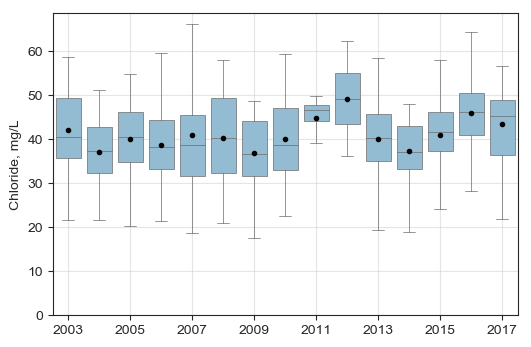

In [59]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

# sns.boxplot(EGRET_Daily['waterYear'], EGRET_Daily['ConcDay'], color=sns.color_palette()[0])

# plt.fill_between(EGRET_Daily_an['waterYear'][5:-1],
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]-EGRET_Daily_an['SE'][5:-1]),
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]+EGRET_Daily_an['SE'][5:-1]), 
#                  color=sns.color_palette()[0], alpha=0.15)
# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

meanpointprops = dict(marker='.', markeredgecolor='black', markersize=6,markerfacecolor='black')
ax = sns.boxplot(showmeans=True, linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="ConcDay", 
                 data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2],
                order=range(2003,2018))

# ax = sns.boxplot(showmeans=True, linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="ConcDay", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
# plt.xlim(2003,2018)
plt.xlim(-0.5, 14.5)
locs, labels = plt.xticks() 
plt.xticks(locs[::2], labels[::2])
plt.ylim(0,None)
# plt.vlines(4.5, 0, 0.6, 'k', '-.', lw=0.7)
# plt.vlines(9.5, 0, 0.6, 'k', '-.', lw=0.7)

# ax.set_xticks([int(x) for x in np.linspace(2003,2017, 8)])

plt.grid(alpha=0.5)
plt.ylabel("Chloride, mg/L")
plt.xlabel("")
# fig.autofmt_xdate()
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/Canada/'+river+'/'+river+'_Cl.pdf')



In [60]:
EGRET_Daily_an['Fx_AE'] = (abs(EGRET_Sample['Fx_Hat'] - EGRET_Sample['Fx_C'])/EGRET_Sample['Fx_C']).mean()*EGRET_Daily_an['FluxYearMTA']




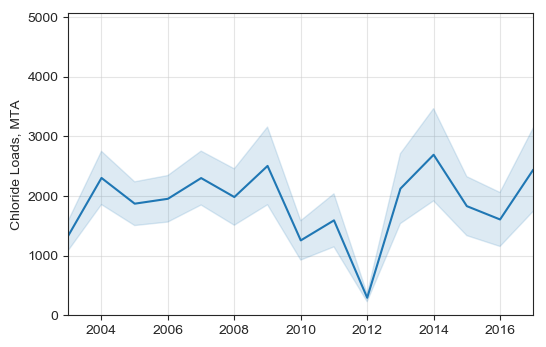

In [61]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

k=None
plt.plot(EGRET_Daily_an['waterYear'][:k], EGRET_Daily_an['FluxYearMTA'][:k], c=sns.color_palette()[0])

# s=12
# plt.plot(EGRET_Daily_an['waterYear'][s:], EGRET_Daily_an['FluxYearMTA'][s:], c=sns.color_palette()[0])

plt.fill_between(EGRET_Daily_an['waterYear'][:k],
                 EGRET_Daily_an['FluxYearMTA'][:k]-EGRET_Daily_an['Fx_SE'][:k],
                 EGRET_Daily_an['FluxYearMTA'][:k]+EGRET_Daily_an['Fx_SE'][:k], 
                 color=sns.color_palette()[0], alpha=0.15)

# plt.fill_between(EGRET_Daily_an['waterYear'][s:],
#                  EGRET_Daily_an['FluxYearMTA'][s:]-EGRET_Daily_an['Fx_SE'][s:],
#                  EGRET_Daily_an['FluxYearMTA'][s:]+EGRET_Daily_an['Fx_SE'][s:], 
#                  color=sns.color_palette()[0], alpha=0.15)



# plt.vlines(2007, 0, 200, 'k', '-.', lw=0.7)
# plt.vlines(2013, 0, 200, 'k', '-.', lw=0.7)


# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

# meanpointprops = dict(marker='D', markeredgecolor='black', markersize=1,markerfacecolor=sns.color_palette()[3])
# ax = sns.boxplot(linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="FluxYearMTA", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
plt.ylim(0,None)
plt.xlim(2003,2017)
# plt.xticks([int(x) for x in np.linspace(5,19,8)], [int(x) for x in np.linspace(2003,2017, 8)])
# plt.ylim(0,200)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Chloride Loads, MTA")
plt.xlabel("")
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/Canada/'+river+'/'+river+'_Cl_Flux.pdf')


In [62]:
print(EGRET_Daily_an[(EGRET_Daily_an.waterYear<2018) & (EGRET_Daily_an.waterYear>2002)][['waterYear', 'FluxYearMTA','Fx_SE']].round(1).T.to_latex(index=False))

\begin{tabular}{rrrrrrrrrrrrrrr}
\toprule
     7  &      8  &      9  &      10 &      11 &      12 &      13 &      14 &      15 &      16 &      17 &      18 &      19 &      20 &      21 \\
\midrule
 2003.0 &  2004.0 &  2005.0 &  2006.0 &  2007.0 &  2008.0 &  2009.0 &  2010.0 &  2011.0 &  2012.0 &  2013.0 &  2014.0 &  2015.0 &  2016.0 &  2017.0 \\
 1334.2 &  2301.2 &  1870.0 &  1951.9 &  2299.1 &  1981.2 &  2502.8 &  1254.7 &  1590.4 &   293.2 &  2121.9 &  2689.8 &  1828.7 &  1605.4 &  2440.0 \\
  249.7 &   446.4 &   366.6 &   389.7 &   451.8 &   473.1 &   651.4 &   329.8 &   444.9 &    66.1 &   585.9 &   773.1 &   494.3 &   452.2 &   698.0 \\
\bottomrule
\end{tabular}



In [63]:
print(TP.groupby('STATION')["RESULT"].describe().reindex(selected_stations).round(2).to_latex())
   

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  count &   mean &    std &   min &    25\% &   50\% &    75\% &   max \\
STATION     &        &        &        &       &        &       &        &       \\
\midrule
ON02GC1000  &   62.0 &  35.26 &  12.48 &  14.9 &  27.52 &  31.9 &  43.27 &  73.8 \\
02GC022     &    NaN &    NaN &    NaN &   NaN &    NaN &   NaN &    NaN &   NaN \\
16016400102 &  122.0 &  40.30 &  12.42 &  19.6 &  32.25 &  37.6 &  45.60 &  91.6 \\
\bottomrule
\end{tabular}

